# Exploration and pre-processing of metadata

In [2]:
## All required library imports for further analysis ##
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from IPython.core.display import SVG
from IPython.display import Audio
import sys
sys.path.append("<<Insert absolute path to the folder containing the config.py file>>")
import config

In [3]:
## All required project-specific imports for further analysis ##
import features as ft

## Read in the initial metadata-file

In [6]:
metadata_df = pd.read_csv(config.METADATA_FILE)
metadata_df.head()

,sample_name,label
0,Hive3_28_07_2017_QueenBee____23_50_00,active
1,Hive1 12_06_2018_QueenBee____00_00_00,active
2,Hive1 12_06_2018_QueenBee____00_10_00,active
3,Hive1 12_06_2018_QueenBee____00_20_00,active
4,Hive1 12_06_2018_QueenBee____00_30_00,active


## Preprocess metadata by extracting hive number from sample name & encoding target feature

In [7]:
ft.preprocess_metadata()

## Data exploration on preprocessed metadata

In [8]:
metadata_column_names = ['sample_name', "label", "hive number"]

metadata_processed = np.load(config.PROCESSED_METADATA_FILE, allow_pickle=True)
metadata_processed_df = pd.DataFrame(metadata_processed, columns=metadata_column_names)

metadata_processed_df = metadata_processed_df.astype({'hive number': 'int32'})
metadata_processed_df = metadata_processed_df.astype({'label': 'int32'})
metadata_processed_df.head()

,sample_name,label,hive number
0,Hive3_28_07_2017_QueenBee____23_50_00,0,3
1,Hive1 12_06_2018_QueenBee____00_00_00,0,1
2,Hive1 12_06_2018_QueenBee____00_10_00,0,1
3,Hive1 12_06_2018_QueenBee____00_20_00,0,1
4,Hive1 12_06_2018_QueenBee____00_30_00,0,1


In [11]:
metadata_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sample_name  573 non-null    object
 1   label        573 non-null    int32 
 2   hive number  573 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 9.1+ KB


In [12]:
metadata_processed_df.describe()

,label,hive number
count,573.000000,573.000000
mean,0.497382,2.005236
std,0.500430,1.000860
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,3.000000
75%,1.000000,3.000000
max,1.000000,3.000000


### Calculate & visualize the data distribution

<Axes: title={'center': 'Verteilung der Datenpunkte nach Anwesenheit einer Bienenkönigin'}>

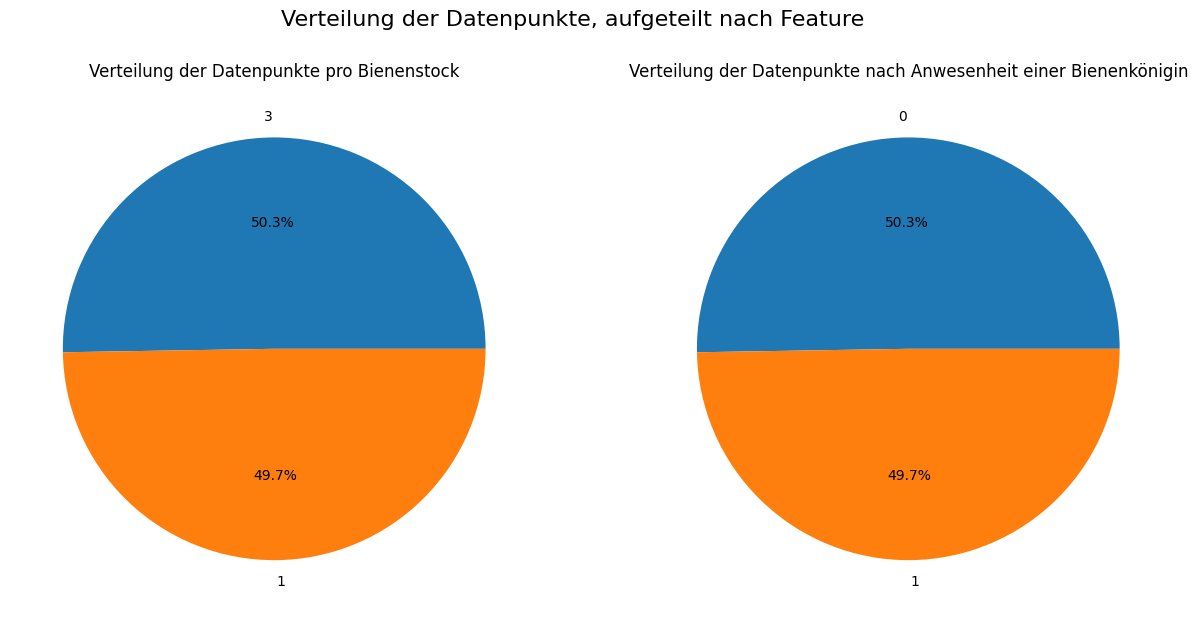

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Verteilung der Datenpunkte, aufgeteilt nach Feature", fontsize=16)

metadata_processed_df.value_counts("hive number").plot.pie(title="Verteilung der Datenpunkte pro Bienenstock", ax=ax[0], ylabel='', autopct='%1.1f%%')
metadata_processed_df.value_counts("label").plot.pie(title="Verteilung der Datenpunkte nach Anwesenheit einer Bienenkönigin", ax=ax[1], ylabel='', autopct='%1.1f%%')

<Axes: title={'center': 'Anteil der Datenpunkte mit Anwesenheit einer Bienenkönigin \n Bienenstock 3'}>

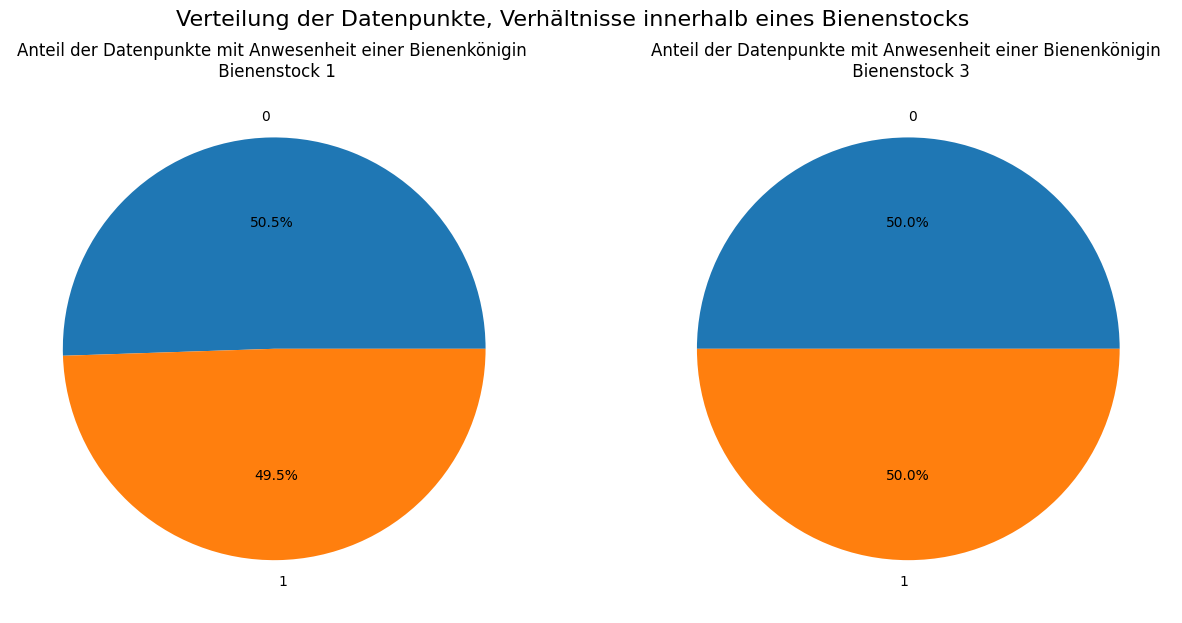

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Verteilung der Datenpunkte, Verhältnisse innerhalb eines Bienenstocks", fontsize=16)

metadata_processed_df[metadata_processed_df["hive number"] == 1].value_counts("label").plot.pie(title="Anteil der Datenpunkte mit Anwesenheit einer Bienenkönigin \n Bienenstock 1", ax=ax[0], ylabel='', autopct='%1.1f%%')
metadata_processed_df[metadata_processed_df["hive number"] == 3].value_counts("label").plot.pie(title="Anteil der Datenpunkte mit Anwesenheit einer Bienenkönigin \n Bienenstock 3", ax=ax[1], ylabel='', autopct='%1.1f%%')

## Preproces actual audiodata

In [10]:
ft.preprocess_data_and_pack_to_npy()
ft.segment_metadata()

Packing audio files to .npy files...
Audio files path: D:\Software-Projekte\Uni\ds_audio\data\raw
Number of audio files: 576
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____00_00_00
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____00_10_00
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____00_20_00
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____00_30_00
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____00_40_00
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____00_50_00
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____01_00_00
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____01_10_00
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____01_20_00
File seems to be existing & processed. Skipping Hive1 12_06_2018_QueenBee____01_30_00
File seems to b

D:\Software-Projekte\Uni\ds_audio\src\features.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
c:\Users\Konstantin\anaconda3\envs\ai_smart_health\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error: Skipping file D:\Software-Projekte\Uni\ds_audio\data\raw\Hive1 31_05_2018_NO_QueenBee____22_40_00.wav due to a runtime error.
File seems to be existing & processed. Skipping Hive1 31_05_2018_NO_QueenBee____22_50_00
File seems to be existing & processed. Skipping Hive1 31_05_2018_NO_QueenBee____23_00_00
File seems to be existing & processed. Skipping Hive1 31_05_2018_NO_QueenBee____23_10_00
File seems to be existing & processed. Skipping Hive1 31_05_2018_NO_QueenBee____23_20_00
File seems to be existing & processed. Skipping Hive1 31_05_2018_NO_QueenBee____23_30_00
File seems to be existing & processed. Skipping Hive1 31_05_2018_NO_QueenBee____23_40_00
File seems to be existing & processed. Skipping Hive1 31_05_2018_NO_QueenBee____23_50_00
File seems to be existing & processed. Skipping Hive3_14_07_2017_NO_QueenBee____00_00_00
File seems to be existing & processed. Skipping Hive3_14_07_2017_NO_QueenBee____00_10_00
File seems to be existing & processed. Skipping Hive3_14_07_2017_N

## Exploration of (preprocessed) audio data

### Output selection of audio files for each combination of hive and queen status

In [9]:
# Select samples
mask_hive_1_queen = (metadata_processed_df["hive number"] == 1) & (metadata_processed_df["label"] == 1)
mask_hive_1_no_queen = (metadata_processed_df["hive number"] == 1) & (metadata_processed_df["label"] == 0)
mask_hive_3_queen = (metadata_processed_df["hive number"] == 3) & (metadata_processed_df["label"] == 1)
mask_hive_3_no_queen = (metadata_processed_df["hive number"] == 3) & (metadata_processed_df["label"] == 0)

sample_names = ["Bienenvolk 1 mit Bienenkönigin", "Bienenvolk 1 ohne Bienenkönigin", "Bienenvolk 3 mit Bienenkönigin", "Bienenvolk 3 ohne Bienenkönigin"]

masks = [mask_hive_1_queen, mask_hive_1_no_queen, mask_hive_3_queen, mask_hive_3_no_queen]
selected_samples = []

for mask in masks:
    sample = metadata_processed_df[mask].iloc[0]
    selected_samples.append(sample)

In [16]:
# Collect audio files for selected samples
sample_audio_files_path = librosa.util.find_files(config.RAW_DATA_PATH)
sample_audio_files = []

for sample in selected_samples:
    audio_time_series, sample_rate = librosa.load(os.path.join(config.RAW_DATA_PATH, sample["sample_name"] + ".wav"), sr=config.sampling_rate)
    sample_audio_files.append({'y': audio_time_series, 'sr': sample_rate})

In [ ]:
# Output audios for selected samples
for i, audio_file in enumerate(sample_audio_files):
  print(sample_names[i])
  audio_player = Audio(data=audio_file['y'], rate=audio_file['sr'])
  display(audio_player)

## Plot Mel-Spectrograms for selected samples

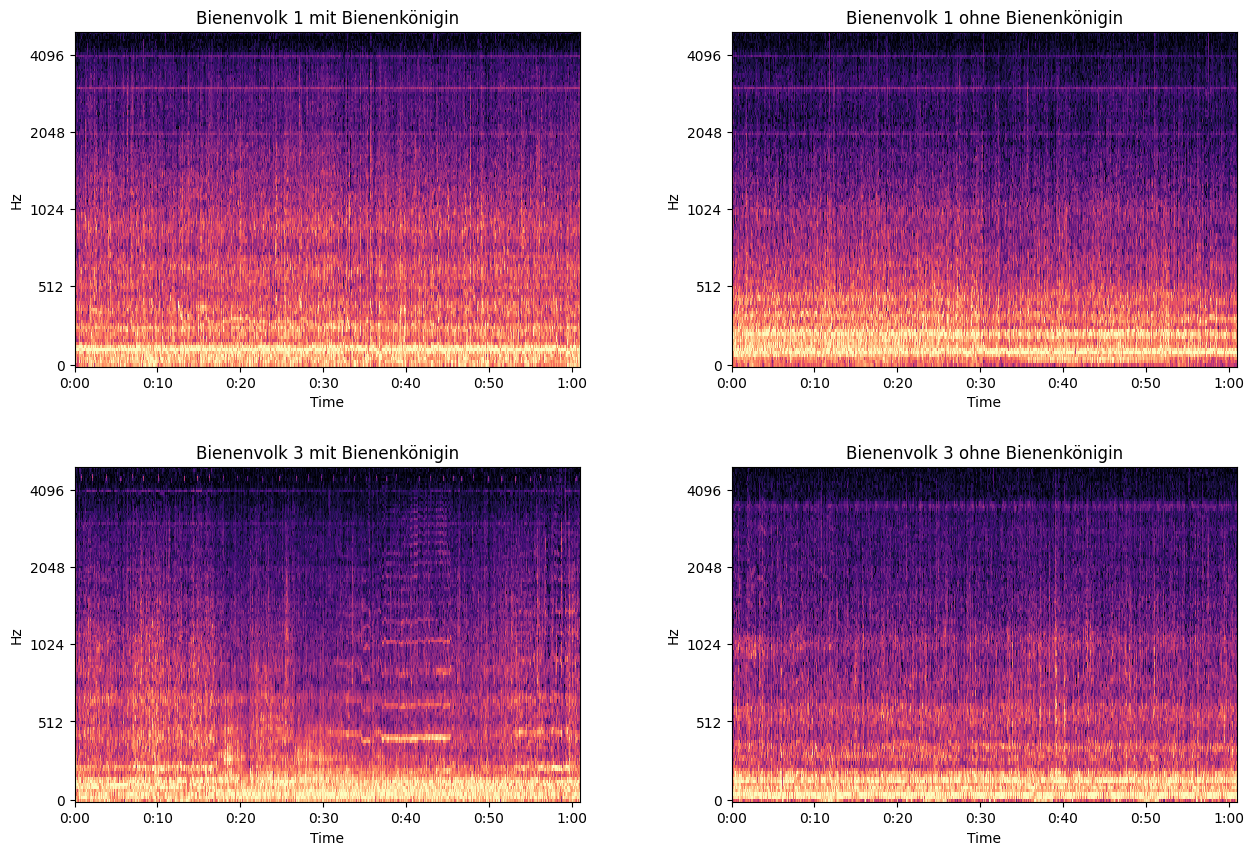

In [12]:

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace = 0.3, hspace=0.3)

for i in range(0, len(selected_samples)):
    melsp = np.load(os.path.join(config.NORMALIZED_MEL_SPEC_PATH, selected_samples[i]["sample_name"] + "__segment0.npy"), allow_pickle=True)
    librosa.display.specshow(melsp, x_axis='time', y_axis='mel', ax=axs[i//2, i%2], sr=config.sampling_rate *2, hop_length=config.hop_length, fmax=config.fmax)
    axs[i//2, i%2].set_title(sample_names[i])